<a href="https://colab.research.google.com/github/rafaballerini/TwitterSentimentAnalysis/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

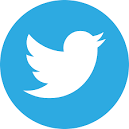

# **Twitter Sentiment Analysis:**

O objetivo desse projeto é **detectar tweets potencialmente maldosos/hate**, a partir da análise de sentimento que cada tweet demonstra, separando-os dos demais <br><br>


# 1- Importação da base de dados:

In [ ]:
import pandas as pd

# treino
uri_train = "train.csv"
train = pd.read_csv(uri_train)

# teste
uri_test = "test.csv"
test = pd.read_csv(uri_test)

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


### Labels:

0- Tweet **sem** sentimento maldoso<br>
1- Tweet **com** sentimento maldoso


In [ ]:
print('Dados para treino:', train.shape, ' e dados para teste: ', test.shape)

Dados para treino: (31962, 3)  e dados para teste:  (17197, 2)


### Quantidades:

- 31.962 dados para treino divididos em 3 colunas (id, label e tweet)
- 17.197 dados para teste divididos em 2 colunas (id e tweet)

In [ ]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

### Exemplos de tweets não maldosos:

In [ ]:
train[train['label'] == 0].head(10) 

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


### Exemplos de tweets maldosos:

In [ ]:
train[train['label'] == 1].head(10) 

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


# 2- Tratamento da base de dados:

### Verificando presença de valores nulos:

In [ ]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Ou seja, não existe nenhum dado com valor nulo <br><br>

### Retirando colunas que não serão utilizadas no modelo:

In [ ]:
train.drop(['id'], axis=1, inplace=True)
test.drop(['id'], axis=1, inplace=True)

train.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


Nesse caso retirei a coluna `id` tanto dos dados de treino, quanto dos dados de teste, pois não a utilizaremos

# 3- Visualizando nossos dados para análise (EDA)

### Utilizando `WordCloud` para visualizar as palavras utilizadas com maior frequência:

In [ ]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

# alocando tweets em uma lista
lista = train['tweet'].tolist()
len(lista)

31962

In [ ]:
# juntando as frases dos tweets em um parágrafo
paragrafo = " ".join(lista)

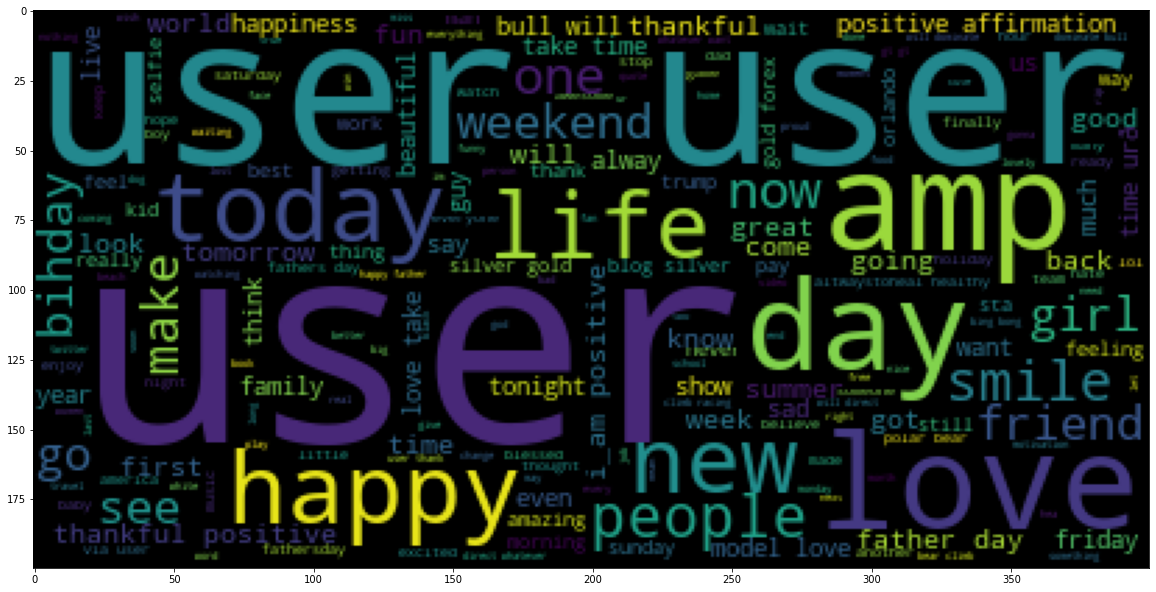

In [ ]:
import matplotlib.pyplot as plt

# exibindo WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(paragrafo))

Podemos perceber que existem muito mais palavras positivas ou neutras do que palavras negativas, como já tínhamos visto, ou seja, temos 13,2 tweets não maldosos para cada 1 tweet madolso

**Os nossos dados estão desbalanceados**

*Obs: na imagem, o tamanho de cada palavra mostra a frequência em que elas aparecem nos tweets que estamos observando*<br><br>

### Analisando palavras **positivas 🙂** em tweets não maldosos:

In [ ]:
positivas = train[train['label']== 0]['tweet']
positivas

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31956    off fishing tomorrow @user carnt wait first ti...
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31961                     thank you @user for you follow  
Name: tweet, Length: 29720, dtype: object

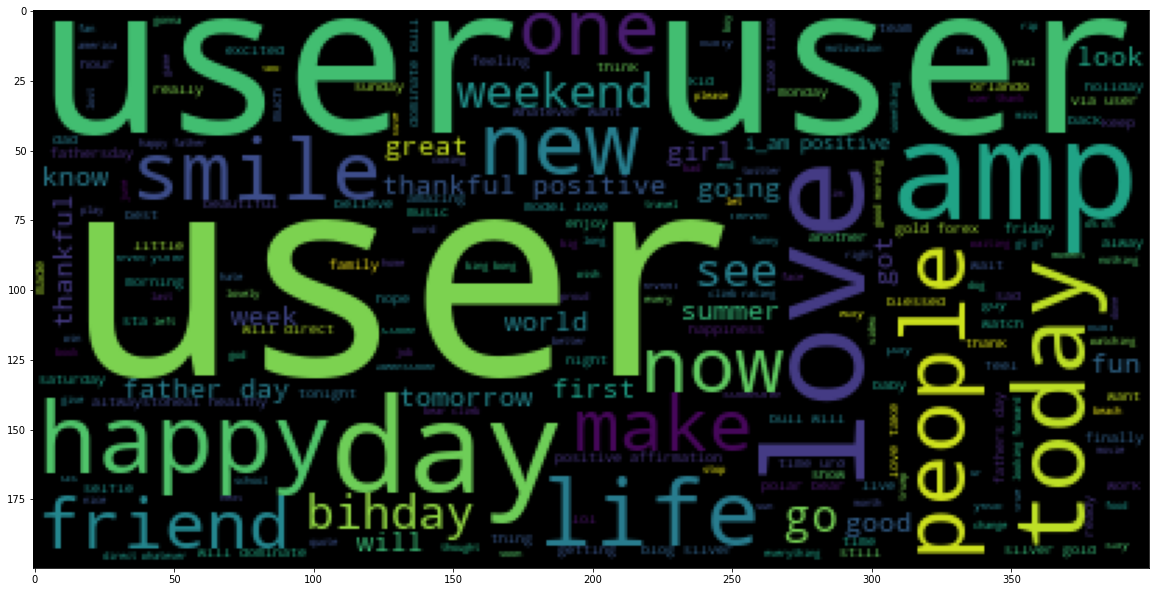

In [ ]:
# alocando tweets positivos em uma lista
lista_positivas = positivas.tolist()

# juntando as frases dos tweets positivos em um parágrafo
paragrafo_positivas = " ".join(lista_positivas)

# exibindo WordCloud das palavras positivas
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(paragrafo_positivas))

Algumas palavras positivas que podemos enxergar: positive, happy, thankful, love, smile, great, fun, good...<br><br>

### Analisando palavras **negativas 😡** em tweets maldosos:

In [ ]:
negativas = train[train['label']== 1]['tweet']
negativas

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

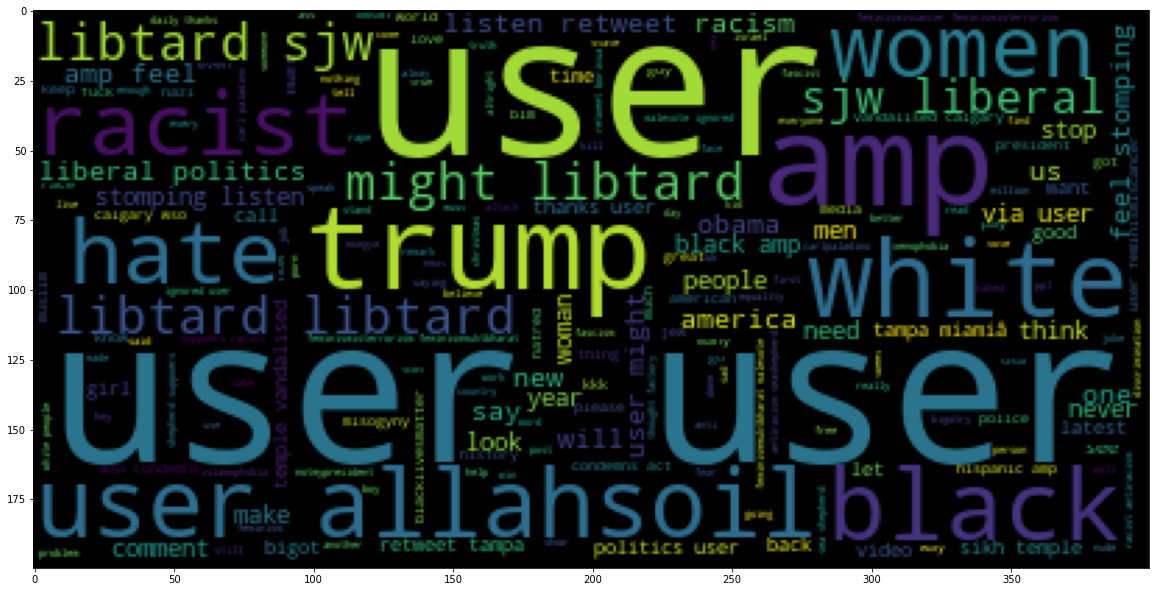

In [ ]:
# alocando tweets negativos em uma lista
lista_negativas = negativas.tolist()

# juntando as frases dos tweets negativos em um parágrafo
paragrafo_negativas = " ".join(lista_negativas)

# exibindo WordCloud das palavras negativas
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(paragrafo_negativas))


Algumas palavras negativas que podemos enxergar: racist, hate, black, white, condemn, bigot...

# 4- Tratamento dos dados após análise:

[Como foi escolhida a forma de tratamento desses dados](https://www.alura.com.br/artigos/lemmatization-vs-stemming-quando-usar-cada-uma?gclid=Cj0KCQjw2MWVBhCQARIsAIjbwoP5Fzw-TVD8m_TI9D0oH637wjwFGfoTb4XGcy0XGk_wAdLTho4CEc0aAr4VEALw_wcB)

### Remoção de **pontuações** utilizando `string.punctuation`:

In [ ]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# criando função para remoção dos pontos
def limpar(text):
    remover_pont = [char for char in text.lower() if char not in string.punctuation]
    remover_pont_join = ''.join(remover_pont)
    
    return remover_pont_join

In [ ]:
# testando a função
limpar('ola @joao, como você está hoje?')

'ola joao como você está hoje'

In [ ]:
# limpando nossos dados
train_limpos = train['tweet'].apply(limpar)
train_limpos[5]

'22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo  '

### Remoção de **palavras irrelevantes e repetitivas** utilizando `nltk`:

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:5])

['i', 'me', 'my', 'myself', 'we']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lista de palavras irrelevantes da **língua inglesa**

In [ ]:
tweets_train = pd.DataFrame(train_limpos)
tweets_train.columns

Index(['tweet'], dtype='object')

In [ ]:
# criando função para remoção de stopwords
def stopword(text):
    remover_stop = [a for a in text.split() if a.lower() not in stopwords]
    remover_stop_join = ' '.join(remover_stop)
    return remover_stop_join

In [ ]:
# testando a função
stopword('I love going to school just by myself')

'love going school'

In [ ]:
# limpando nossos dados
train_limpos_stop = tweets_train['tweet'].apply(stopword)
train_limpos_stop[:2]

0    user father dysfunctional selfish drags kids d...
1    user user thanks lyft credit cant use cause do...
Name: tweet, dtype: object

In [ ]:
tweets_df = pd.DataFrame(train_limpos_stop)
tweets_df.head()

,tweet
0,user father dysfunctional selfish drags kids d...
1,user user thanks lyft credit cant use cause do...
2,bihday majesty
3,model love u take u time urð± ðððð...
4,factsguide society motivation


### Transformando palavras na sua **versão primitiva** utilizando `PorterStemmer`:

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# criando função para transformação em palavras primitivas
def steming(text):
    stem = [stemmer.stem(word) for word in text.split()]
    stem_join = ' '.join(stem)
    return stem_join

In [ ]:
# testando a função
steming('user father dysfunctional selfish drags kids dysfunction run')

'user father dysfunct selfish drag kid dysfunct run'

In [ ]:
# limpando nossos dados
tweets_df_stem = tweets_df['tweet'].apply(steming)
tweets_df_stem[5]

'22 huge fan fare big talk leav chao pay disput get allshowandnogo'

Porém esse tipo de abordagem com `stemmer` pode acabar reduzindo a palavras que não existem ou não são utilizadas normalmente

### Lematização utilizando `WordNetLemmatizer()`

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk

lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# criando função para lematização
def lematize(text):
    ste = [lemmatizer.lemmatize(word) for word in text.split()]
    ste_join = ' '.join(ste)
    return ste_join

In [ ]:
# testando a função
lematize('user father dysfunctional selfish drags kids dysfunction run')

'user father dysfunctional selfish drag kid dysfunction run'

In [ ]:
# limpando nossos dados
tweets_df_lem = tweets_df['tweet'].apply(lematize)
tweets_df_lem[5]

'22 huge fan fare big talking leave chaos pay dispute get allshowandnogo'

In [ ]:
df = pd.DataFrame(tweets_df_lem)
df.head()

,tweet
0,user father dysfunctional selfish drag kid dys...
1,user user thanks lyft credit cant use cause do...
2,bihday majesty
3,model love u take u time urð± ðððð...
4,factsguide society motivation


# 5- Utilizando a técnica `CountVectorizer`

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from pandas import DataFrame

cv = CountVectorizer(max_features=5000)
sen = df['tweet'].tolist()

def document_matrix(text, vectorizer):
    mat = vectorizer.fit_transform(text)
    return DataFrame(mat.toarray())

m = document_matrix(sen,cv)
m.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Separação de treino e teste:

In [ ]:
from sklearn.model_selection import train_test_split

y = train['label']
y.head()

x_train, x_test, y_train, y_test = train_test_split(m, y, test_size = 0.33, random_state = 25)

### Criação do modelo e utilização do algoritmo `Naive Bayes`:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(x_train, y_train)

# predição do treino
y_pred_train = NaiveBclassifier.predict(x_train)
# acurácia do treino
acc = accuracy_score(y_train, y_pred_train)
acc

0.9623143737741664

### Testando nosso modelo com dados de teste:

In [ ]:
y_pred_test = NaiveBclassifier.predict(x_test)

### Acurácia:

In [ ]:
acuracia = accuracy_score(y_test, y_pred_test)
acuracia

0.9473833902161547

Ou seja, uma acurácia de **94.7%**

### Matriz Confusão:

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[9492,  314],
       [ 241,  501]])

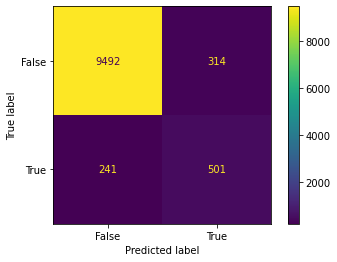

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm, display_labels=['False', 'True'])
cmd.plot()

### Analisando a Matriz Confusão:

**TP** - 501<br>
**FP** - 241<br>
**TN** - 9492<br>
**FN** - 314<br><br>

**Accuracy Score** = (TP + TN) / TOTAL <br>
(501 + 9492) / 10.548 = **94,73%**

# 6- Utilizando a técnica `Tfidf Vectorizer`

[Diferença entre Count Vectorizers x Tfidf Vectorizer](https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vec = TfidfVectorizer(max_features=2500)
n = document_matrix(sen, tfidf_vec)
n.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Separação de treino e teste:

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(n, y, test_size=0.33, random_state=25)

### Criação do modelo e utilização do algoritmo `Naive Bayes`:

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NaiveBclassifier = MultinomialNB()
NaiveBclassifier.fit(x_train,y_train)

# predição do treino
y_pred_train = NaiveBclassifier.predict(x_train)
# acurácia do treino
acc = accuracy_score(y_train, y_pred_train)
acc

0.9528812926123097

### Testando nosso modelo com dados de teste:

In [ ]:
y_pred_test = NaiveBclassifier.predict(x_test)

### Acurácia:

In [ ]:
acuracia = accuracy_score(y_test, y_pred_test)
acuracia

0.9494690936670459

Ou seja, uma acurácia de **94.9%**

### Matriz Confusão:

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[9783,   23],
       [ 510,  232]])

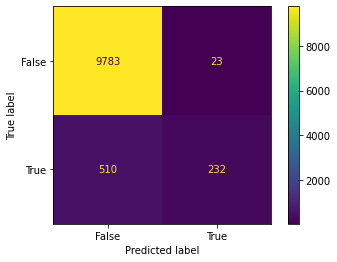

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(cm, display_labels=['False', 'True'])
cmd.plot()

### Analisando a Matriz Confusão:

**TP** - 232<br>
**FP** - 23<br>
**TN** - 9783<br>
**FN** - 510<br><br>

**Accuracy Score** = (TP + TN) / TOTAL <br>
(501 + 9492) / 10.548 = **94,94%**